In [1]:
from Higgs.tools.ImplementationUtils import implementMeasurement
from Higgs.tools.MeasurementValidation import *
from ggCorrelations import ggTheoryCorrMat
import Higgs.signals as HS
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rc("axes",labelsize="large")

# from pdg 2020
br_Z_hadr = 69.911e-2
br_W_hadr = 67.41e-2

## ATLAS `H/vbfH->tautau` 36fb-1 [1811.08856](https://arxiv.org/abs/1811.08856)

In [2]:
subMeasurements = {
    "H_tautau": {
        "obs": [
            3.1 - np.sqrt(1 ** 2 + 1.3 ** 2),
            3.1,
            3.1 + np.sqrt(1 ** 2 + 1.6 ** 2),
        ],
        "process": {"channels": [["H", "tautau"]]},
    },
    "vbfH_tautau": {
        "obs": [
            0.28 - np.sqrt(0.09 ** 2 + 0.09 ** 2),
            0.28,
            0.28 + np.sqrt(0.09 ** 2 + 0.11 ** 2),
        ],
        "process": {"channels": [["vbfH", "tautau"]]},
    },
}

measFile = implementMeasurement(
    "1811.08856",
    "p. 24",
    subMeasurements,
    corrMatExp=pd.DataFrame(index=subMeasurements.keys(),columns=subMeasurements.keys(),data=[[1,-0.52],[-0.52,1]]),
    prefix="tautau_H",
    referenceMass=125,
    massResolution=10,
)

Looks good. Saving this to tautau_H_LHC13_ATLAS_36.json


Compare to [Fig. 11](http://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/HIGG-2017-07/fig_11.png)

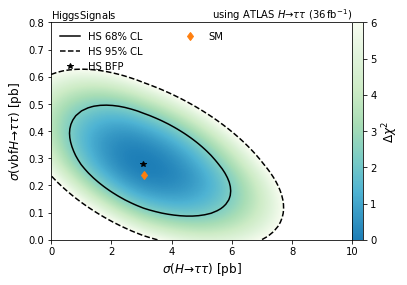

In [3]:
import Higgs.predictions as HP

meas = HS.Measurement(measFile)

rateH = np.linspace(0, 10)
ratevbfH = np.linspace(0, 0.8)


def setRates(particle, hRate, vbfRate):
    particle.setChannelRate(meas.collider(), "H", "tautau", hRate)
    particle.setChannelRate(meas.collider(), "vbfH", "tautau", vbfRate)


fig, ax = validateMeasurementRates(meas, rateH, ratevbfH, setRates, r"$H\to \tau\tau$")
ref = HP.SMHiggsEW(meas.referenceMass())
ax.plot(
    ref.channelRate(meas.collider(), "H", "tautau"),
    ref.channelRate(meas.collider(), "vbfH", "tautau"),
    marker="d",
    c="tab:orange",
    ls="none",
    label="SM",
)
ax.legend(loc="upper center", frameon=False)

ax.set_xlabel(r"$\sigma(H\to \tau\tau)$ [pb]")
ax.set_ylabel(r"$\sigma(\mathrm{vbf} H\to \tau\tau)$ [pb]")
plt.show()


## CMS `H>tautau` STXS 78fb-1 [CMS-PAS-HIG-18-032](https://cds.cern.ch/record/2668685)

Commented out because superseded by [2204.12957](https://arxiv.org/abs/2204.12957)
(implemented below)

While there is already a newer published result with more data ([2107.11486](http://arxiv.org/abs/2107.11486)) exists, that one is a differential measurement without usable signal composition information, so we still use this one instead.

Implementation from HS-2, using data and reference cxns from Tab.9 and Fig. 10. 

In [4]:
# qqHproc = {"channels": [[p, "tautau"] for p in ("vbfH", "HW", "HZ")]}

# bins = {
#     "ggH_0j": {"obs": [-1.955, -0.68, 0.612], "ref": [1.6, 1.7, 1.8]},
#     "ggH_1j_pT_high": {"obs": [0.0474, 0.108, 0.1788], "ref": [0.05, 0.06, 0.07]},
#     "ggH_1j_pT_low": {"obs": [-0.709, -0.1394, 0.4223], "ref": [0.35, 0.41, 0.47]},
#     "ggH_1j_pT_med": {"obs": [-0.0672, 0.3528, 0.7896], "ref": [0.24, 0.28, 0.32]},
#     "ggH_2j": {"obs": [-0.0819, 0.0987, 0.2898], "ref": [0.16, 0.21, 0.26]},
#     "VH": {
#         "obs": [-0.09768, -0.04329, 0.01369],
#         "ref": [0.036, 0.037, 0.038],
#         "process": qqHproc,
#         "channelWeights": [2.4, 30.8 * br_W_hadr, 30.8 * br_Z_hadr],
#     },
#     "pTj1_high": {
#         "obs": [0.005076, 0.019881, 0.034404],
#         "ref": [0.0137, 0.0141, 0.0145],
#         "process": qqHproc,
#         "channelWeights": [4.3, 3.9 * br_W_hadr, 3.9 * br_Z_hadr],
#     },
#     "rest": {
#         "obs": [-0.68632, -0.19504, 0.31096],
#         "ref": [0.179, 0.184, 0.189],
#         "process": qqHproc,
#         "channelWeights": [55.5, 52.1 * br_W_hadr, 52.1 * br_Z_hadr],
#     },
#     "vbf": {
#         "obs": [0.08094, 0.114, 0.1482],
#         "ref": [0.105, 0.114, 0.123],
#         "process": qqHproc,
#         "channelWeights": [31.1, 1.2 * br_W_hadr, 1.2 * br_Z_hadr],
#     },
# }
# for k, b in bins.items():
#     if k.startswith("ggH"):
#         b["process"] = {"channels": [["H", "tautau"]]}

# dfcorr = (
#     pd.read_csv(
#         "https://gitlab.com/higgsbounds/higgssignals/-/raw/master/data/Expt_tables/LHC13_Apr2020/18032_CMS_H-tautau.stxscorr",
#         sep=r"\s+",
#         names=["bin1", "bin2", "corr"],
#     )
#     .set_index(["bin1", "bin2"])
#     .rename(
#         index={
#             1803201: "ggH_0j",
#             1803204: "ggH_1j_pT_high",
#             1803202: "ggH_1j_pT_low",
#             1803203: "ggH_1j_pT_med",
#             1803205: "ggH_2j",
#             1803207: "VH",
#             1803208: "pTj1_high",
#             1803209: "rest",
#             1803206: "vbf",
#         }
#     )
# )
# corrmat = pd.DataFrame(
#     columns=bins.keys(), index=bins.keys(), data=np.identity(len(bins))
# )
# for _, c in dfcorr.iterrows():
#     k1, k2 = c.name
#     if k1 != k2:
#         corrmat.loc[k1, k2] = c["corr"]
#         corrmat.loc[k2, k1] = c["corr"]

# measFile = implementMeasurement(
#     1726688,
#     "Fig. 10, Tab. 9, Fig. 11",
#     bins,
#     corrMatExp=corrmat,
#     prefix="tautau",
#     referenceMass=125,
#     massResolution=10,
#     luminosity=77.4,
#     collider="LHC13",
# )


Compare to Fig. 9. The mu plot matches pretty well, the kappa plot is also fine
except for the flat direction towards large k_V. This is resolved in the paper
by including some H->WW measurements, so this difference is expected.

In [5]:
# kappaF = np.linspace(0, 2)
# kappaV = np.linspace(0, 2)
# fig, ax = validateMeasurementKappa(
#     HS.Measurement(measFile),
#     kappaF,
#     kappaV,
#     r"$H\to \tau\tau$",
# )


# mu1 = np.linspace(-1, 2.5)
# mu2 = np.linspace(0, 3)


# def modFacs(muF, muV):
#     return {x: [muF] if x.startswith("ggH") else 3 * [muV] for x in bins.keys()}


# fig, ax = validateMeasurementModFactors(
#     HS.Measurement(measFile),
#     mu1,
#     mu2,
#     modFacs,
#     r"$H\to \tau\tau$",
# )
# ax.plot(1, 1, marker="d", c="tab:orange", ls="none", label="SM")
# ax.legend(loc="upper center", frameon=False)

# ax.set_xlabel(r"$\mu_F$")
# ax.set_ylabel(r"$\mu_V$")
# plt.show()

## CMS `H>tautau` STXS 138fb-1 [2204.12957](https://arxiv.org/abs/2204.12957)

In [2]:
"""
Format of tables on hepdata all mixed up and not according to
usual notation, cannot use standard functions
-> Defne my own, should be improved in the future
"""
def regulariseBinNameCor1(df):
    df['x'] = [x.replace(r'\text', '').strip(' ') for x in df['STXS 1.2 Bin (x)']]
    df['y'] = [x.replace(r'\text', '').strip(' ') for x in df['STXS 1.2 Bin (y)']]
    df.drop(columns=['STXS 1.2 Bin (x)', 'STXS 1.2 Bin (x)'], inplace=True)
    return df

def regulariseBinName2(df):
    df['Process'] = [x.replace(r'\text', '').strip(' ') for x in df['Process']]
    df['Process'] = [x.replace(r'\mu', '') for x in df['Process']]
    return df

def regulariseBinName(name):
    table = {ord(c): None for c in ("$", "_", "{", "}", "^")}
    table[ord("-")] = ord("_")
    return name.translate(table)

os.system("wget 'https://www.hepdata.net/download/table/ins2072861/Cross%20section%20measurements%20in%20the%20STXS%20stage-1.2%20bins%20(NN%2BVH)/1/csv'")
dfobs = pd.read_csv('csv', comment='#')

os.system("wget 'https://www.hepdata.net/download/table/ins2072861/STXS%20stage-1.2%20signal%20strengths%20(NN%2BVH)/1/csv'")
dfmus = pd.read_csv('csv.1', comment='#')

os.system("wget 'https://www.hepdata.net/download/table/ins2072861/Correlation%20matrix%20of%20the%20STXS%20stage-1.2%20POIs%20(NN%2BVH)/1/csv'")
dfcor = pd.read_csv('csv.2', comment='#')

--2023-05-15 13:30:40--  https://www.hepdata.net/download/table/ins2072861/Cross%20section%20measurements%20in%20the%20STXS%20stage-1.2%20bins%20(NN%2BVH)/1/csv
Resolving www.hepdata.net (www.hepdata.net)... 188.185.7.94, 188.185.24.33, 188.185.30.5, ...
Connecting to www.hepdata.net (www.hepdata.net)|188.185.7.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1685 (1.6K) [text/csv]
Saving to: ‘csv’

     0K .                                                     100%  171M=0s

2023-05-15 13:30:40 (171 MB/s) - ‘csv’ saved [1685/1685]

--2023-05-15 13:30:41--  https://www.hepdata.net/download/table/ins2072861/STXS%20stage-1.2%20signal%20strengths%20(NN%2BVH)/1/csv
Resolving www.hepdata.net (www.hepdata.net)... 188.185.7.94, 188.185.24.33, 188.185.30.5, ...
Connecting to www.hepdata.net (www.hepdata.net)|188.185.7.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [text/csv]
Saving to: ‘csv.1’

     0K ..                     

In [3]:
"""
Process observed cross sections. Have to re-sort
rows because all the tables on hepdata have
different order of the bins... 
"""
dfobs = (
    dfobs
    .set_index("Process")
    .rename(
        index=regulariseBinName,
        columns={
            "Cross Section": "obs",
            "total +": "obs+",
            "total -": "obs-",
        },
    )
    .reset_index()
)
dfobs = regulariseBinName2(dfobs)
sortobs = [0,1,2,3,4,5,6,7,11,8,9,10,12,13,14,15]
dfobs['sort'] = sortobs
dfobs.sort_values(by=['sort'], inplace=True)
dfobs.reset_index(inplace=True)
dfobs.drop(columns=['index', 'sort'], inplace=True)
dfobs['obs+'] += dfobs['obs']
dfobs['obs-'] += dfobs['obs']

"""
Process observed signal strengths.
"""
dfmus = (
    dfmus
    .set_index("Parameter")
    .rename(
        index=regulariseBinName,
        columns={
            "Signal Strength NN Analysis": "obs",
            "total +": "obs+",
            "total -": "obs-",
        },
    )
    .reset_index()
)
dfmus.rename(columns={"Parameter": "Process"}, inplace=True)
dfmus.drop(columns=['bbb +', 'bbb -', 'syst +', 'syst -', 'stat +', 'stat -'], inplace=True)
dfmus.drop(dfmus.index[[8]], inplace=True)
dfmus.reset_index(inplace=True)
dfmus.drop(columns=['index'], inplace=True)
dfmus = regulariseBinName2(dfmus)
sortmus = [11,8,9,10,6,7,0,1,2,3,4,5,12,13,14,15]
dfmus['sort'] = sortmus
dfmus.sort_values(by=['sort'], inplace=True)
dfmus.reset_index(inplace=True)
dfmus.drop(columns=['index', 'sort'], inplace=True)
dfobs['Process'] = dfmus['Process']

"""
Get cross sections: not given on hepdata,
but can be calculated via XSexp = XSobs / Mu_obs.
-> Small differences (~ %) compared to numbers
   given in table 9
"""
dfexp = pd.DataFrame()
dfexp['Process'] = dfmus['Process']
dfexp['exp'] = dfobs['obs'].to_numpy() / dfmus['obs'].to_numpy(dtype='float32')
# Uncertainties from from table 9
dfexp['exp+'] = [
    0.13, 0.07, 0.14, 0.14, 0.19, 0.23, 0.42, 0.47,
    0.04, 0.04, 0.03, 0.03, 0.03, 0.05, 0.06, 0.10]
dfexp['exp-'] = dfexp['exp'] - dfexp['exp+']
dfexp['exp+'] = dfexp['exp'] + dfexp['exp+']

dfobs['exp'] = dfexp['exp']
dfobs['exp+'] = dfexp['exp+']
dfobs['exp-'] = dfexp['exp-']
bins = {
    name: {
        "ref": [r["exp-"], r["exp"], r["exp+"]],
        "obs": [r["obs-"], r["obs"], r["obs+"]],
    }
    for name, r in dfobs.set_index("Process").iterrows()
}

for name, dat in bins.items():
    if name.startswith("ggH"):
        dat["process"] = {"channels": [["H", "tautau"]]}
    elif "ZH" in name:
        dat["process"] = {"channels": [["HZ", "tautau"]]}
    elif "WH" in name:
        dat["process"] = {"channels": [["HW", "tautau"]]}
    elif "qqH" in name:
        dat["process"] = {"channels": [["vbfH", "tautau"]]}

"""
Process correlation matrix
"""
dfcor = regulariseBinNameCor1(dfcor)
procx = list(dfcor['x'].unique())
procy = list(dfcor['y'].unique())


cors = np.identity(16)
for i, r in dfcor.iterrows():
    if r['x'] == r['y']:
        continue
    ix = procx.index(r['x'])
    iy = procy.index(r['y'])
    try:
        cors[ix, iy + 1] = 1e-2 * float(r['Correlation coefficient'])
        cors[iy + 1, ix] = 1e-2 * float(r['Correlation coefficient'])
    except ValueError:
        pass

proc = []
for name, dat in bins.items():
    proc.append(name)

ordered = [
    proc[0],
    proc[1],
    proc[6],
    proc[7],
    proc[2],
    proc[3],
    proc[4],
    proc[5],
    proc[11],
    proc[10],
    proc[8],
    proc[9],
    proc[12],
    proc[13],
    proc[14],
    proc[15]
]

corrMat = pd.DataFrame(cors)
corrMat.index = ordered
corrMat.columns = ordered

# A bit of guess work because bins different, but numerical impact tiny
dc1 = {b: "0j" for b in corrMat.index if b.startswith("gg2H_0j_pTH")}
dc2 = {
   "ggH 1 JetpTH [0,60]": "1j_0_60",
   "ggH 1 JetpTH [60,120]": "1j_60_120",
   "ggH 1 JetpTH [120,200]": "1j_120_200",
   "ggH \geq 2 JetpTH [0,200]": ">=2j_120_200",
   "ggHpTH [200_300]": ">=1j_>200"}
dc = {**dc1 , **dc2}
corrMatTheo = ggTheoryCorrMat(dc, corrMat)

measFile = implementMeasurement(
    "2072861",
    "https://doi.org/10.17182/hepdata.127974.v1/t3, https://doi.org/10.17182/hepdata.127974.v1/t5, https://doi.org/10.17182/hepdata.127974.v1/t8, http://dgillber.web.cern.ch/dgillber/ggF_uncertainty_2017/corr2017.pdf",
    bins,
    prefix="tautau_CMS_STXS_139ifb",
    corrMatExp=corrMat,
    corrMatTheo=corrMatTheo,
    referenceMass=125,
    massResolution=2.5,
)

os.remove("csv")
os.remove("csv.1")
os.remove("csv.2")

Looks good. Saving this to tautau_CMS_STXS_139ifb_LHC13_CMS_138.json


Compare to figure 15. Looks reasonable.

Regarding flat direction in kapV see Jonas'
comment about validation plot of the
previously implemented result CMS-PAS-HIG-18-032.

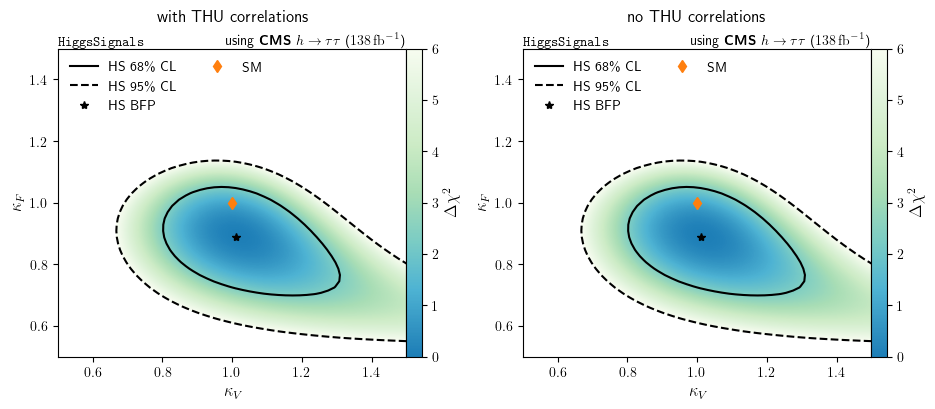

In [4]:
"""
Validation plot: Compare to figure 15
"""
plt.rc("text", usetex=True)


kappaF = np.linspace(0.5, 1.5)
kappaV = np.linspace(0.5, 1.5)

description = r"$h\to \tau\tau$"

fig, axs = plt.subplots(ncols=2, figsize=(11, 4))

axs[0].set_title("with THU correlations", pad=20)
validateMeasurementKappa(
    HS.Measurement(measFile),
    kappaF,
    kappaV,
    description,
#   official={95: official95, 68: official68, "BF": officialBF},
    fig=fig,
    ax=axs[0],
)

axs[1].set_title("no THU correlations", pad=20)
validateMeasurementKappa(
    HS.Measurement(
        measFile, HS.MeasurementOptions(whichCorrelations="experimentalOnly")
    ),
    kappaF,
    kappaV,
    description,
#   official={95: official95, 68: official68, "BF": officialBF},
    fig=fig,
    ax=axs[1],
)

plt.show()

## CMS `H>tautau` CP-phase measurement 137fb-1 [2110.04836](http://arxiv.org/abs/2110.04836)

In [9]:
from math import radians

bins = {
    "alphaCP": {
        "coupling": "alphaCPTauYuk",
        "obsCoupling": [radians(-1 - 19), radians(-1), radians(-1 + 19)],
        "process": {"channels": [[p, "tautau"] for p in ("H", "vbfH")]},
    },
    "ggH": {
        "obs": [0.59 - 0.32, 0.59, 0.59 + 0.28],
        "ref": 3 * [1],
        "process": {"channels": [["H", "tautau"]]},
    },
    "vbfH": {
        "obs": [1.39 - 0.47, 1.39, 1.39 + 0.56],
        "ref": 3 * [1],
        "process": {"channels": [["vbfH", "tautau"]]},
    },
}

corrMat = pd.DataFrame(
    index=bins.keys(), columns=bins.keys(), data=np.identity(len(bins))
)
corrMat.loc["alphaCP", "ggH"] = 0.029
corrMat.loc["alphaCP", "vbfH"] = -0.026
corrMat.loc["ggH", "vbfH"] = -0.763

measFile = implementMeasurement(
    "2110.04836",
    "Aux. Tab. 2, Aux. Fig. 30",
    bins,
    corrMatExp=corrMat,
    prefix="tautau_CP",
    referenceMass=125.38,
    massResolution=0.15 * 125,  # p.7 15-20%
)


Looks good. Saving this to tautau_CP_LHC13_CMS_137.json


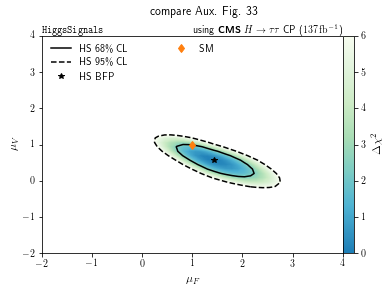

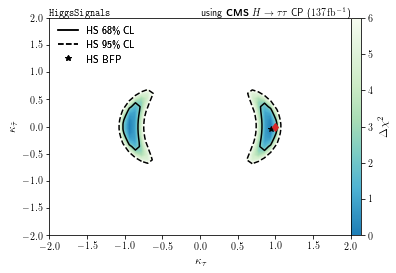

In [10]:
meas = HS.Measurement(measFile)

def modFacs(muV, muF):
    return {"ggH": [muF], "vbfH": [muV]}


fig, ax = validateMeasurementModFactors(
    HS.Measurement(measFile),
    np.linspace(-2, 4),
    np.linspace(-2, 4),
    modFacs,
    r"$H\to \tau\tau$ CP",
)
ax.plot(1, 1, marker="d", c="tab:orange", ls="none", label="SM")
ax.legend(loc="upper center", frameon=False)

ax.set_xlabel(r"$\mu_F$")
ax.set_ylabel(r"$\mu_V$")
fig.suptitle("compare Aux. Fig. 33")
plt.show()

pred = HP.Predictions()
h = pred.addParticle(HP.NeutralScalar("h"))
h.setMass(125)

coups = HP.scaledSMlikeEffCouplings(1)


def getChisq(kappa_e, kappa_o):
    coups.tautau = kappa_e + kappa_o * 1j
    HP.effectiveCouplingInput(h, coups, reference="SMHiggsEW")
    return meas(pred)


test = np.frompyfunc(getChisq, 2, 1)
ce = np.linspace(-2, 2)
co = np.linspace(-2, 2)
chisq = test(*np.meshgrid(ce, co))
fig, ax = plt.subplots()
chisqPlot(
    fig,
    ax,
    ce,
    co,
    chisq,
    experiment="CMS",
    description=r"$H\to\tau\tau$ CP",
    luminosity=meas.luminosity(),
)
ax.plot(1, 0, c="tab:red", marker="d")
ax.set_xlabel(r"$\kappa_\tau$")
ax.set_ylabel(r"$\kappa_{\tilde{\tau}}$")
plt.show()
